In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__) 

1.11.0+cu115


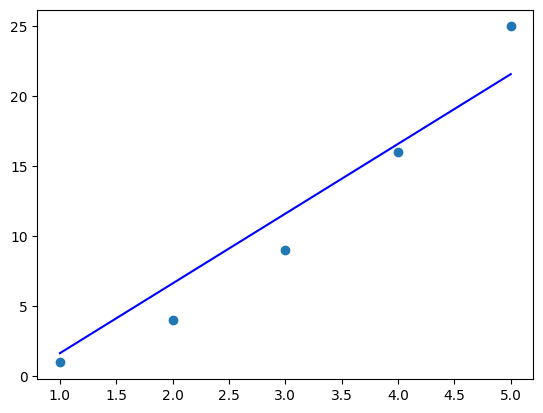

In [6]:
# data = pd.read_csv('./data.csv')  # 获取数据
# data.head() # 查看数据
# data.info() # 数据详情 
x = [1,2,3,4,5]
y = [1,4,9,16,25] 

plt.scatter(x,y) # 作图

'''
从numpy中创建torch张量 torch.from_numpy()
改变数组或张量的形状 reshape(-1,1) -1自适应,维度长度为1
改变数组或张量的类型 type()
数据预处理
'''
# X = torch.from_numpy(x.values.reshape(-1,1)).type(torch.FloatTesor)
# Y = torch.from_numpy(y.values.reshape(-1,1)).type(torch.FloatTesor)

X = torch.from_numpy(np.array(x).reshape(-1,1)).type(torch.FloatTensor)
Y = torch.from_numpy(np.array(y).reshape(-1,1)).type(torch.FloatTensor)

# 生成模型
from torch import nn # 导入PyTorch的神经网络模块
# 继承nn.Module(是PyTorch中所有神经网络模型的基类)
# class testModel(nn.Module): 
#     # 初始化方法，初始化模型的属性和参数
#     def __init__(self,in_features, out_features): # self表示的是testModel类的实例对象
#         # 调用父类nn.Module的初始化方法(必须同时传入子类和实例对象作为参数)
#         super(testModel,self).__init__() # testModel是一个类变量
#         # 赋值一个线性层对象 y = wx + b，其中w是权重，b是偏差
#         self.linear = nn.Linear(in_features, out_features) # 输入长度，输出长度
#     # 定义模型的前向传播方法(给模型输入数据时会被自动调用，用来计算模型的输出)
#     def forward(self,inputs): # 定义实例对象的行为
#         # 使用线性层作为函数对输入进行变换(表示模型对输入的预测值)
#         logits = self.linear(inputs)
#         return logits
    
in_features = 1 ; out_features = 1
# model = testModel(in_features,out_features) # 实例化

# 生成模型
model = nn.Linear(in_features,out_features)

# 训练模型
loss_fn = nn.MSELoss() # 损失函数(均方误差)
opt = torch.optim.SGD(model.parameters(),lr=0.0001) # 随机梯度下降优化器

for epoch in range(5000): # 优化五千轮
    for x,y in zip(X,Y): # zip() 对应赋值
        '''
            x = torch.randn(1,requires_grad = True)
            y = torch.zeros(1,requires_grad = True)
            lr = 0.0001
            y_pred = w@x + b
            loss = (y-y_pred)**2.mean()
        '''
        y_pred = model(x) # 预测值 model.linear(x)
        loss = loss_fn(y_pred,y) # 损失

        '''
            if not w.grad is None
                w.grade.data.zero_()
            if not b.grad is None
                b.grade.data.zero_()
            loss.backward()
            with torch.no_grad():
                w.data -= lr * w.grad.data
                b.data -= lr * b.grad.data
        '''
        # 将优化器中存储的梯度清零
        opt.zero_grad()
        # 使用反向传播算法计算损失函数关于模型参数的梯度
        loss.backward() # 存储在参数的grad属性中
        # 使用优化器根据梯度更新模型参数 
        opt.step()
 
# 画出模型预测
plt.plot(X,model(X).detach().numpy(),"b")   